In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

from datetime import datetime

/Users/raphaeloliveira/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
df = pd.read_csv(uri)

In [3]:
df = df[['mileage_per_year', 'model_year', 'price', 'sold']]
df.shape

(10000, 4)

In [4]:
df.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [5]:
change_sold = {
    'no': 0,
    'yes': 1
}
df['sold'] = df['sold'].map(change_sold)
df.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [6]:
current_year = datetime.now().date().year

df['model_age'] = current_year - df['model_year']

In [7]:
df.head()

,mileage_per_year,model_year,price,sold,model_age
0,21801,2000,30941.02,1,23
1,7843,1998,40557.96,1,25
2,7109,2006,89627.50,0,17
3,26823,2015,95276.14,0,8
4,7935,2014,117384.68,1,9


In [8]:
df['km_per_year'] = df['mileage_per_year'] * 1.60934
df.head()

,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,21801,2000,30941.02,1,23,35085.22134
1,7843,1998,40557.96,1,25,12622.05362
2,7109,2006,89627.50,0,17,11440.79806
3,26823,2015,95276.14,0,8,43167.32682
4,7935,2014,117384.68,1,9,12770.11290


In [9]:
df_n = df[['price', 'sold', 'model_age', 'km_per_year']] 
df_n.head()

,price,sold,model_age,km_per_year
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [10]:
x = df[['price', 'model_age', 'km_per_year']]
y = df['sold']

In [23]:
SEED = 5

np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    x, y, 
    test_size=0.25, 
    stratify=y,
)

# TODO: arvores de decisão não precisam colocar o modelo em uma escala
# scaler = StandardScaler()
# scaler.fit(raw_train_x)

# train_x = scaler.transform(raw_train_x)
# test_x = scaler.transform(raw_test_x)

In [40]:
# model = DecisionTreeClassifier(max_depth=5) # 79.32%
model = DecisionTreeClassifier(max_depth=5)
model.fit(raw_train_x, train_y)

y_pred = model.predict(raw_test_x)
# ja testa a acuracia do modelo por padrão
accuracy = accuracy_score(test_y, y_pred) * 100

print(f"Treinaremos com {len(raw_train_x)} e testaremos com {len(raw_test_x)} elementos")
print("Acurácia do modelo foi: %.2f%%" % accuracy)

Treinaremos com 7500 e testaremos com 2500 elementos
Acurácia do modelo foi: 79.32%


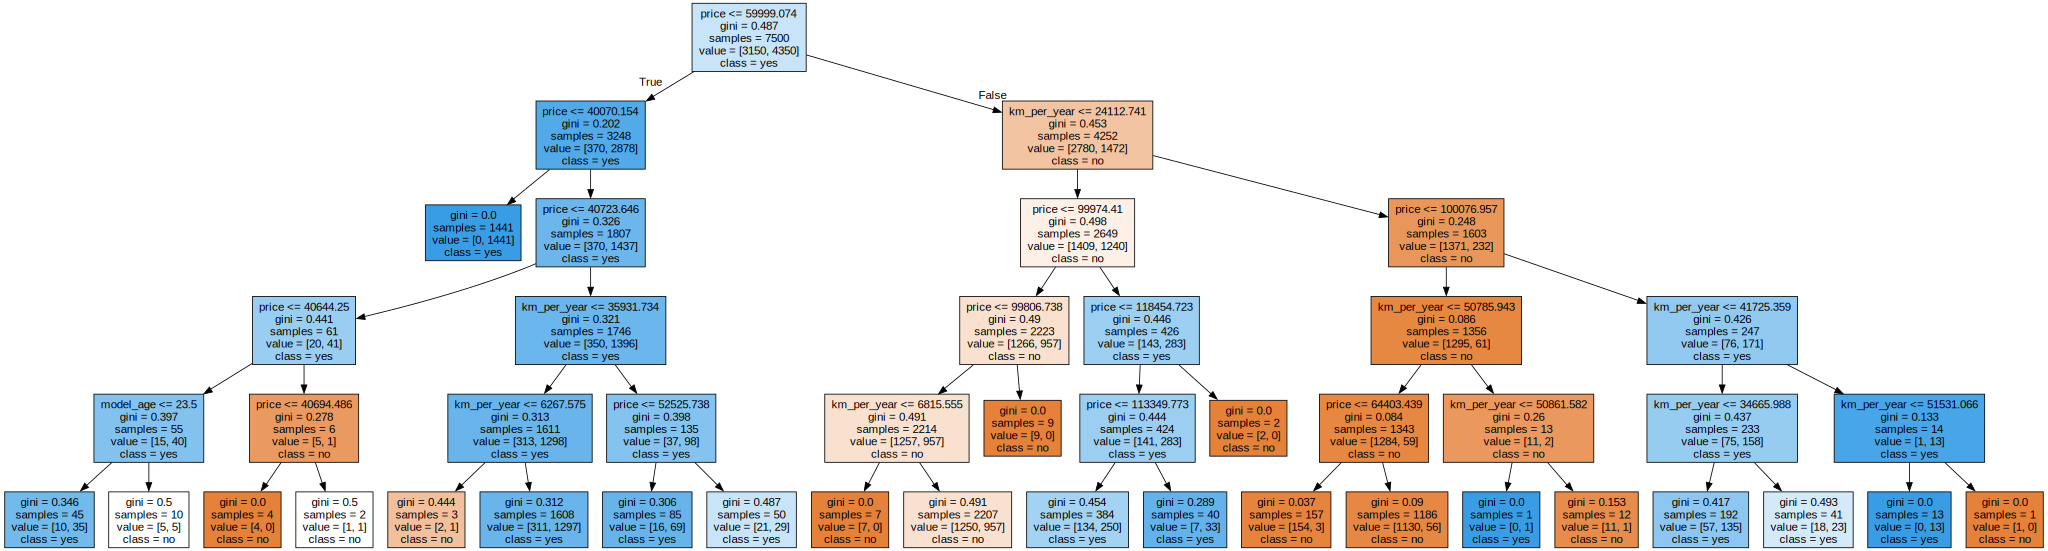

In [41]:
from sklearn.tree import export_graphviz
import graphviz

names = x.columns
dot_data = export_graphviz(
    model,
    filled=True,
    # rounded=True,
    feature_names=names,
    class_names=['no', 'yes']
)
graph = graphviz.Source(dot_data)
graph